# Algorithm Performance Data Analysis - Run 3

In [1]:
# Import relevant modules 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# Load the data

## Run4 
data = pd.read_csv('IndividualCompressionData_since_test_20231031_154932.csv')

In [2]:
# Inspect the data
data

SN                TestID      FileName  OriginalFileSize  \
0      1  test_20231031_154932  10404007.png            502730   
1      2  test_20231031_154932   1254659.png            342646   
2      3  test_20231031_154932  10188041.png            221231   
3      4  test_20231031_154932  10287332.png            216980   
4      5  test_20231031_154932  11610969.png            368720   
...   ..                   ...           ...               ...   
4635   6  test_20231031_155752  10350842.png            212614   
4636   7  test_20231031_155752  10863862.png            317432   
4637   8  test_20231031_155752  11382381.png            312486   
4638   9  test_20231031_155752  11079715.png            443815   
4639  10  test_20231031_155752  11551286.png            271883   

      CompressedBinSize  FileSizeDifference  CompressionRate  CompressionTime  \
0                 27377              475353         0.945543               29   
1                 84372              258274         0.753763               44   
2                 11047              210184         0.950066               11   
3                 13912              203068         0.935883                3   
4                 31817              336903         0.913710                5   
...                 ...                 ...              ...              ...   
4635               3329              209285         0.984343                2   
4636               5752              311680         0.981880                3   
4637                527              311959         0.998314                2   
4638              94754              349061         0.786501                6   
4639                164              271719         0.999397                1   

      DecompressionTime  UniquePixelCountBefore  UniquePixelCountAfter  \
0                    17                   61265                   3948   
1                     9                   80080                  11681   
2                     8                   41731                   1550   
3                     6                   22337                   1894   
4                     7                   84111                   4634   
...                 ...                     ...                    ...   
4635                  6                   42529                    490   
4636                  6                   66058                    845   
4637                  6                   46745                     69   
4638                  7                  124136                  13324   
4639                  5                   40092                     22   

      UniquePixelCountReduction  UniquePixelCountReductionRate        MAE  \
0                         57317                       0.935559  24.980919   
1                         68399                       0.854133  19.952688   
2                         40181                       0.962857  10.226011   
3                         20443                       0.915208   9.119531   
4                         79477                       0.944906  18.978633   
...                         ...                            ...        ...   
4635                      42039                       0.988478  22.883356   
4636                      65213                       0.987208  36.777687   
4637                      46676                       0.998524  22.832848   
4638                     110812                       0.892666  18.728500   
4639                      40070                       0.999451  18.120286   

              MSE       PSNR  QuadtreeThreshold  \
0     3241.644400  13.023150                120   
1     2913.615216  13.486482                120   
2      952.977829  18.339976                120   
3      704.396043  19.652635                120   
4     2421.380016  14.290174                120   
...           ...        ...                ...   
4635  3250.823627  13.010870                135   
4636  6782.798960 

## Analyze per Image

In [3]:
# Select an image
image_name = data['FileName'].iloc[0]  # Gets the first image name; replace with a specific name if needed
# Get all the test result for this image
singe_image_data = data[data['FileName'] == image_name] 

In [4]:
singe_image_data

SN                TestID      FileName  OriginalFileSize  \
0      1  test_20231031_154932  10404007.png            502730   
10     1  test_20231031_154934  10404007.png            502730   
20     1  test_20231031_154935  10404007.png            502730   
30     1  test_20231031_154937  10404007.png            502730   
40     1  test_20231031_154938  10404007.png            502730   
...   ..                   ...           ...               ...   
4590   1  test_20231031_155748  10404007.png            502730   
4600   1  test_20231031_155749  10404007.png            502730   
4610   1  test_20231031_155750  10404007.png            502730   
4620   1  test_20231031_155751  10404007.png            502730   
4630   1  test_20231031_155752  10404007.png            502730   

      CompressedBinSize  FileSizeDifference  CompressionRate  CompressionTime  \
0                 27377              475353         0.945543               29   
10                27377              475353         0.945543                4   
20                27377              475353         0.945543                5   
30                27377              475353         0.945543                4   
40                27377              475353         0.945543                4   
...                 ...                 ...              ...              ...   
4590              12162              490568         0.975808                3   
4600              11982              490748         0.976166                4   
4610              11982              490748         0.976166                3   
4620              11982              490748         0.976166                3   
4630              11982              490748         0.976166                3   

      DecompressionTime  UniquePixelCountBefore  UniquePixelCountAfter  \
0                    17                   61265                   3948   
10                    6                   61265                   3948   
20                    8                   61265                   3948   
30                    6                   61265                   3948   
40                   17                   61265                   3948   
...                 ...                     ...                    ...   
4590                  5                   61265                   1779   
4600                  6                   61265                   1754   
4610                  6                   61265                   1754   
4620                  6                   61265                   1754   
4630                  6                   61265                   1754   

      UniquePixelCountReduction  UniquePixelCountReductionRate        MAE  \
0                         57317                       0.935559  24.980919   
10                        57317                       0.935559  24.980919   
20                        57317                       0.935559  24.980919   
30                        57317                       0.935559  24.980919   
40                        57317                       0.935559  24.980919   
...                         ...                            ...        ...   
4590                      59486                       0.970962  26.559920   
4600                      59511                       0.971370  26.782478   
4610                      59511                       0.971370  26.782478   
4620                      59511                       0.971370  26.782478   
4630                      59511                       0.971370  26.782478   

              MSE       PSNR  QuadtreeThreshold  \
0     3241.644400  13.023150                120   
10    3241.644400  13.023150                120   
20    3241.644400  13.023150                120   
30    3241.644400  13.023150                120   
40    3241.644400  13.023150                120   
...           ...        ...                ...   
4590  3673.928880  12.479496                135   
4600  3724.003221 

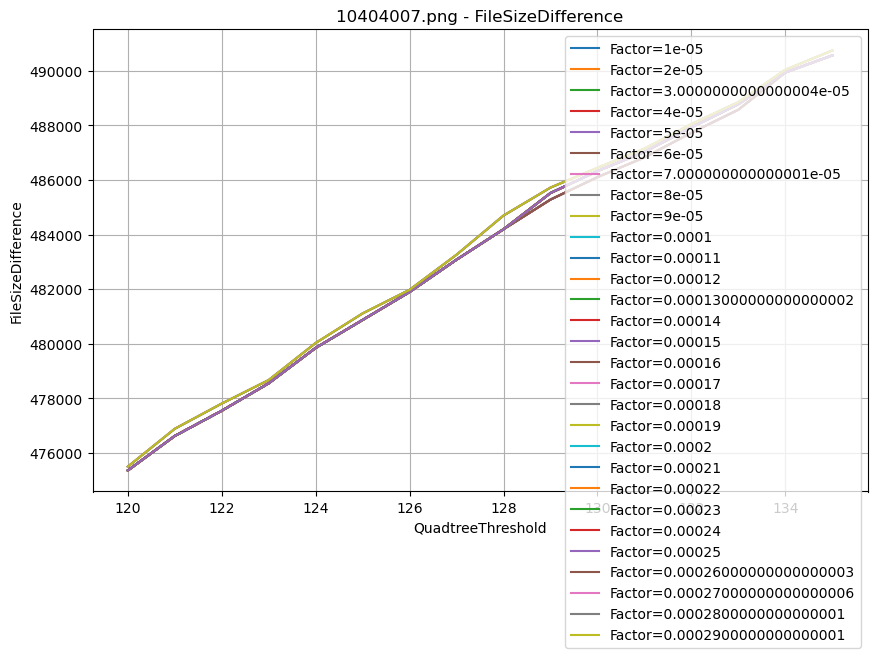

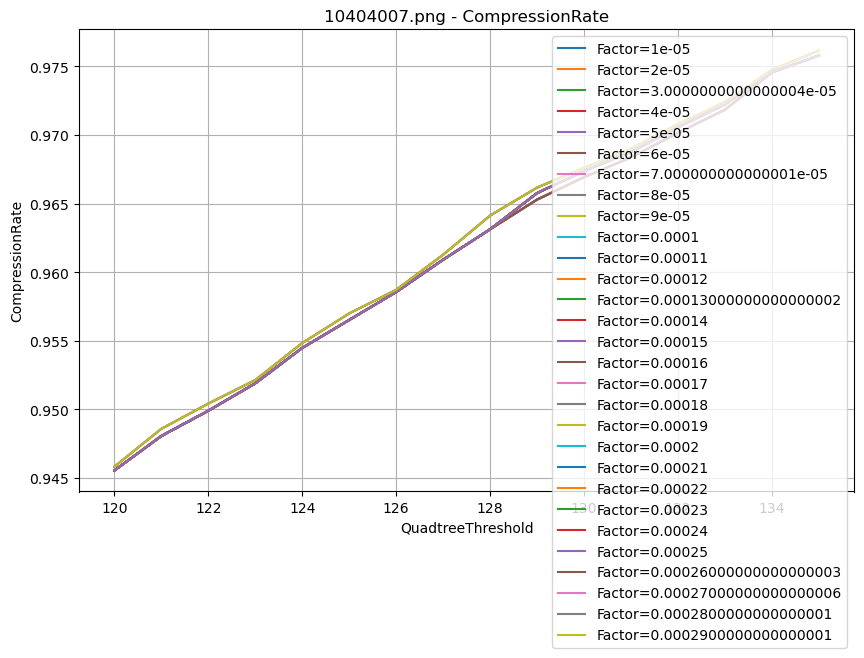

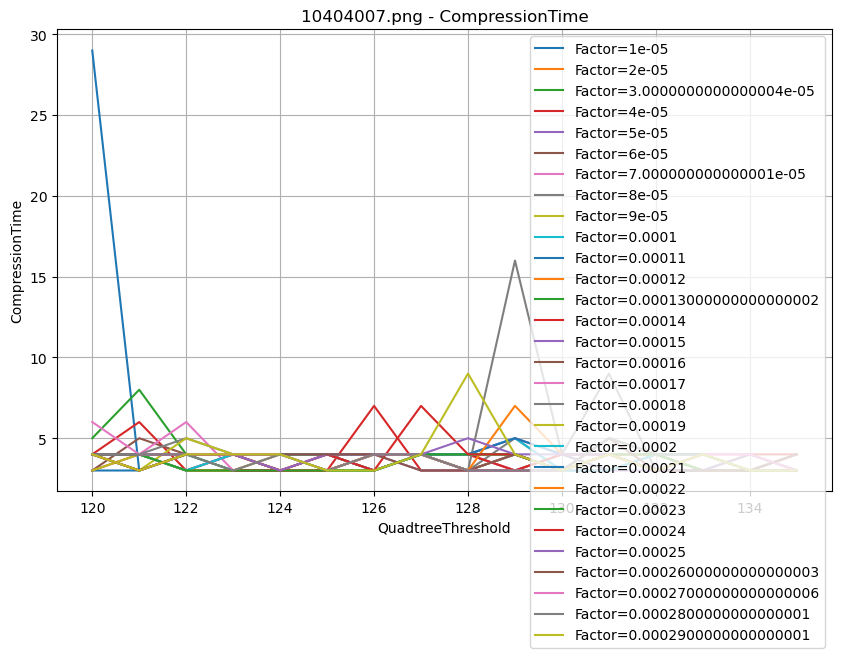

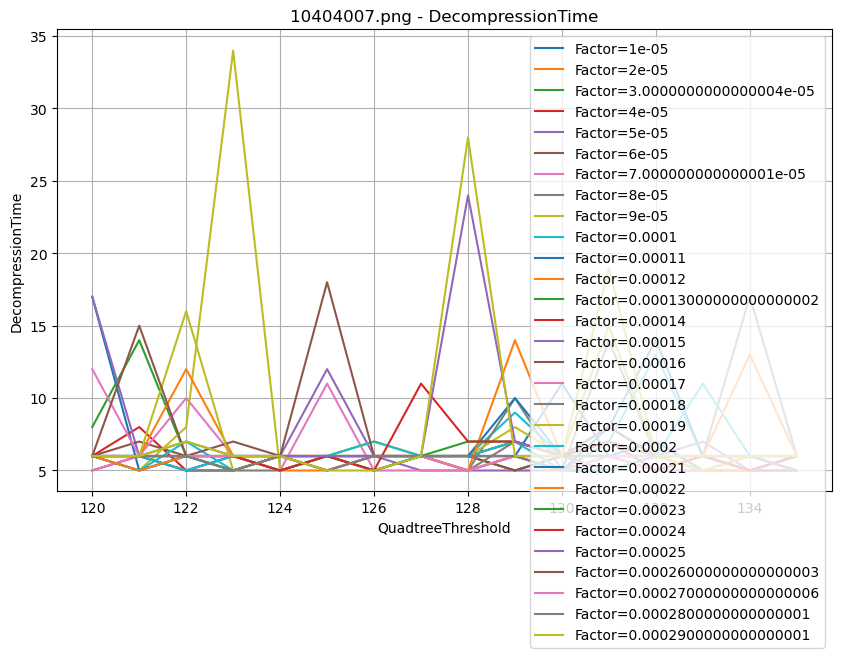

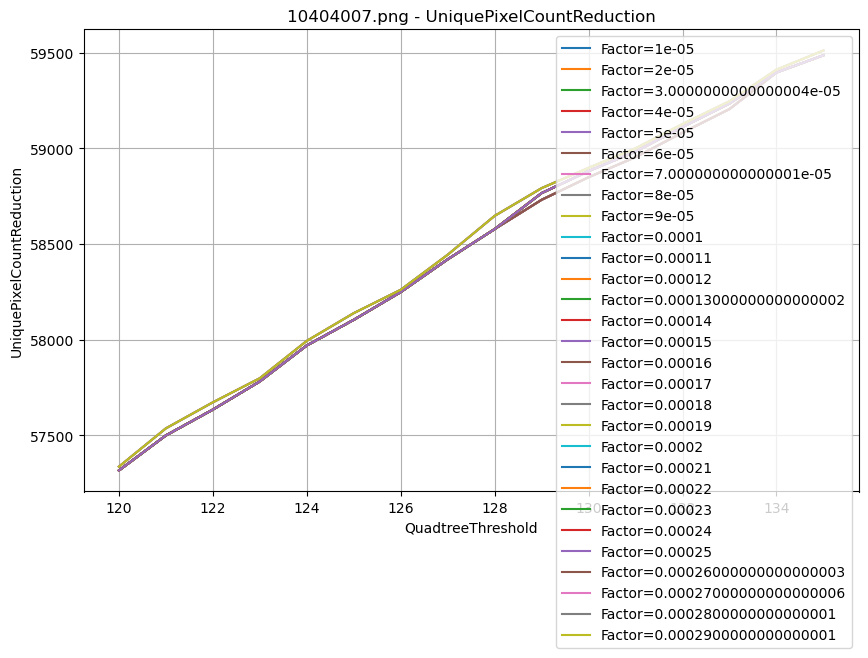

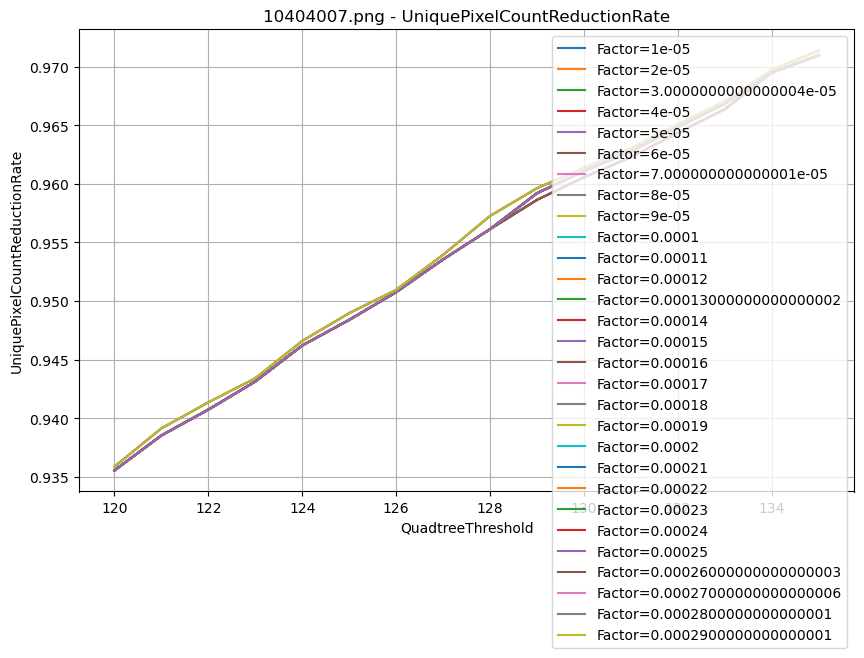

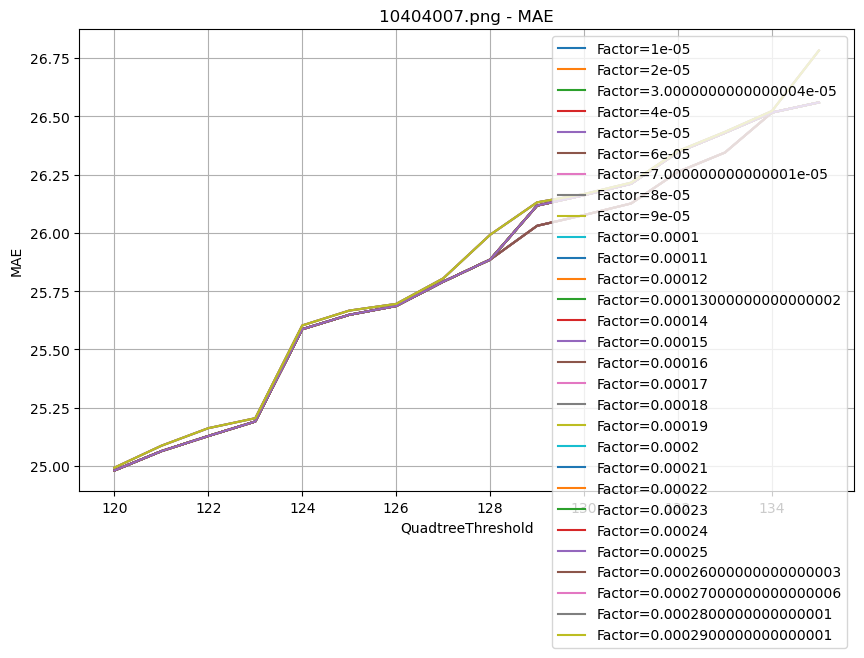

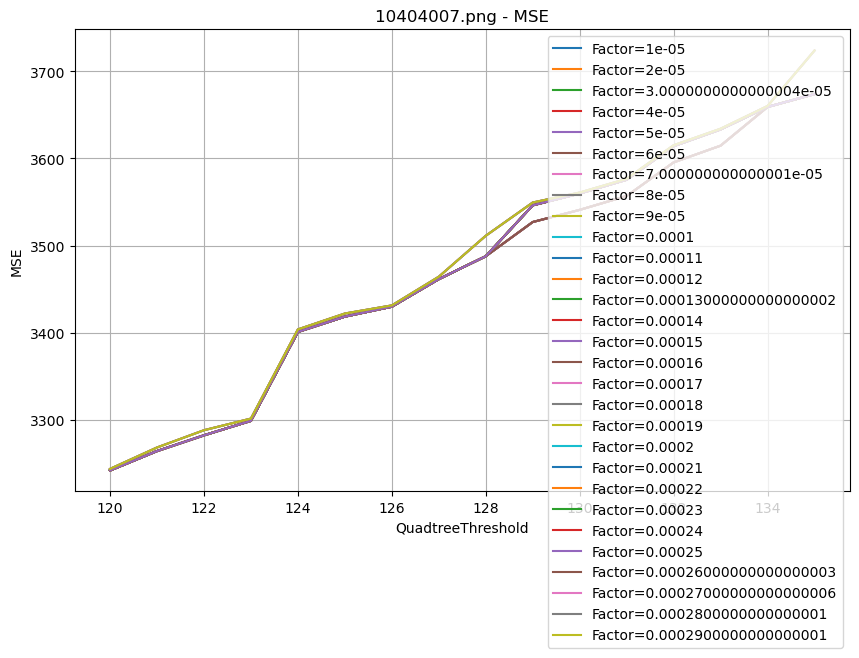

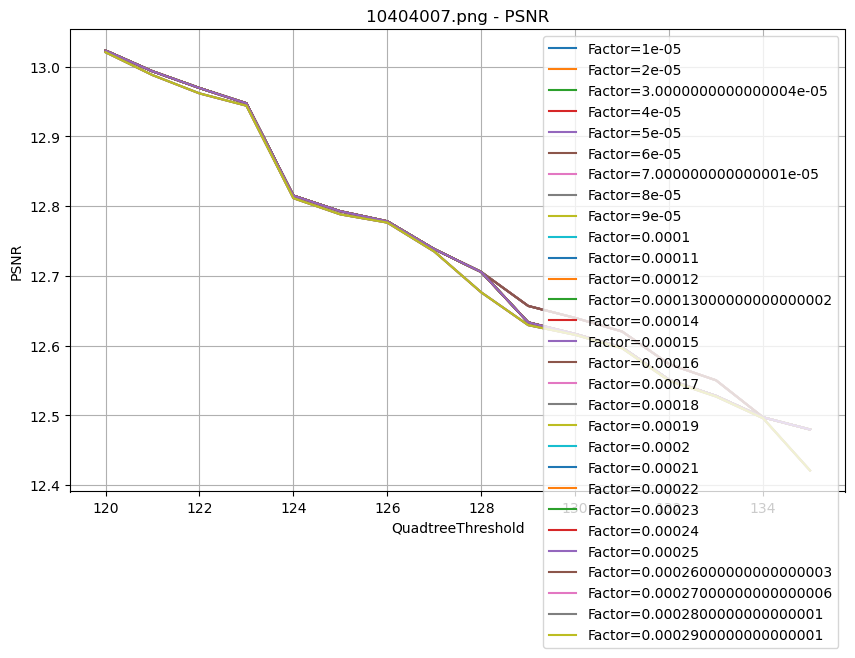

In [5]:
# List of metrics interested in
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

# Create a separate plot for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Group by AllowedExceedingThresholdFactor and plot
    for key, sub_group in singe_image_data.groupby('AllowedExceedingThresholdFactor'):
        plt.plot(sub_group['QuadtreeThreshold'], sub_group[metric], label=f'Factor={key}')
    
    plt.title(f'{image_name} - {metric}')
    plt.xlabel('QuadtreeThreshold')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()


## Analyze per Test

In [6]:
# Group the data based on 'TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor', calculate the mean for each of them 
data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()

/var/folders/y7/s3dq5fdd6pzgms8yt_kxxqw00000gn/T/ipykernel_8170/1924922927.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()


In [7]:
data_grouped_by_test

TestID  QuadtreeThreshold  AllowedExceedingThresholdFactor  \
0    test_20231031_154932                120                          0.00001   
1    test_20231031_154934                120                          0.00002   
2    test_20231031_154935                120                          0.00003   
3    test_20231031_154937                120                          0.00004   
4    test_20231031_154938                120                          0.00005   
..                    ...                ...                              ...   
459  test_20231031_155748                135                          0.00025   
460  test_20231031_155749                135                          0.00026   
461  test_20231031_155750                135                          0.00027   
462  test_20231031_155751                135                          0.00028   
463  test_20231031_155752                135                          0.00029   

      SN  OriginalFileSize  CompressedBinSize  FileSizeDifference  \
0    5.5          321053.7            32689.5            288364.2   
1    5.5          321053.7            32689.5            288364.2   
2    5.5          321053.7            32689.5            288364.2   
3    5.5          321053.7            32689.5            288364.2   
4    5.5          321053.7            32689.5            288364.2   
..   ...               ...                ...                 ...   
459  5.5          321053.7            20688.1            300365.6   
460  5.5          321053.7            20593.6            300460.1   
461  5.5          321053.7            20593.6            300460.1   
462  5.5          321053.7            20593.6            300460.1   
463  5.5          321053.7            20593.6            300460.1   

     CompressionRate  CompressionTime  DecompressionTime  \
0           0.910580             11.2                8.2   
1           0.910580              4.2                7.3   
2           0.910580              3.6                6.0   
3           0.910580              3.6                6.0   
4           0.910580              3.6                7.2   
..               ...              ...                ...   
459         0.943798              3.0                5.3   
460         0.944102              3.3                6.1   
461         0.944102              2.6                5.6   
462         0.944102              3.0                6.7   
463         0.944102              3.0                5.9   

     UniquePixelCountBefore  UniquePixelCountAfter  UniquePixelCountReduction  \
0                   60908.4                 4584.8                    56323.6   
1                   60908.4                 4584.8                    56323.6   
2                   60908.4                 4584.8                    56323.6   
3                   60908.4                 4584.8                    56323.6   
4                   60908.4                 4584.8                    56323.6   
..                      ...                    ...                        ...   
459                 60908.4                 2932.6                    57975.8   
460                 60908.4                 2919.3                    57989.1   
461                 60908.4                 2919.3                    57989.1   
462                 60908.4                 2919.3                    57989.1   
463                 60908.4                 2919.3                    57989.1   

     UniquePixelCountReductionRate        MAE          MSE       PSNR  
0                         0.939470  17.345540  2048.609038  15.452202  
1                         0.939470  17.345540  2048.609038  15.452202  
2                         0.939470  17.345540  2048.609038  15.452202  
3                         0.939470  17.345540  2048.609038  15.452202  
4                         0.939470  17.345540  2048.609038  15.452202  
..                             ...        ...          ...        ...  
459                

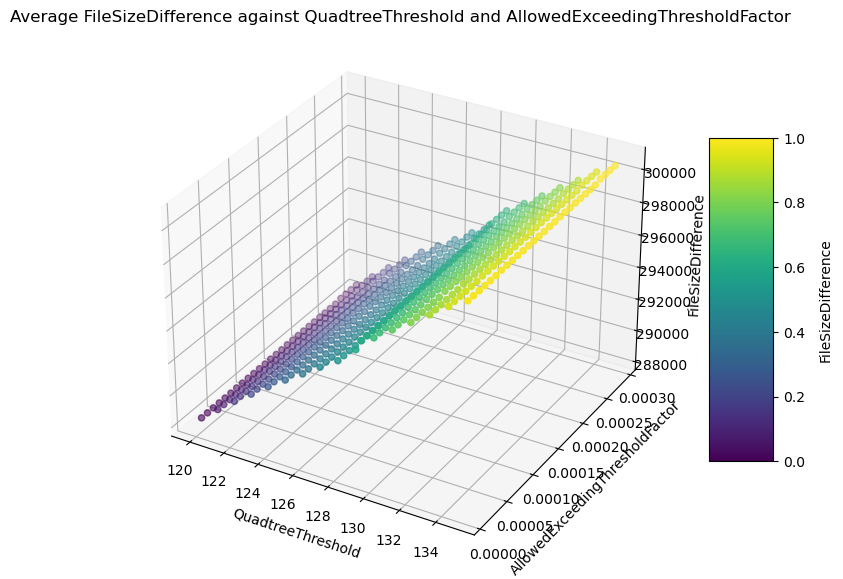

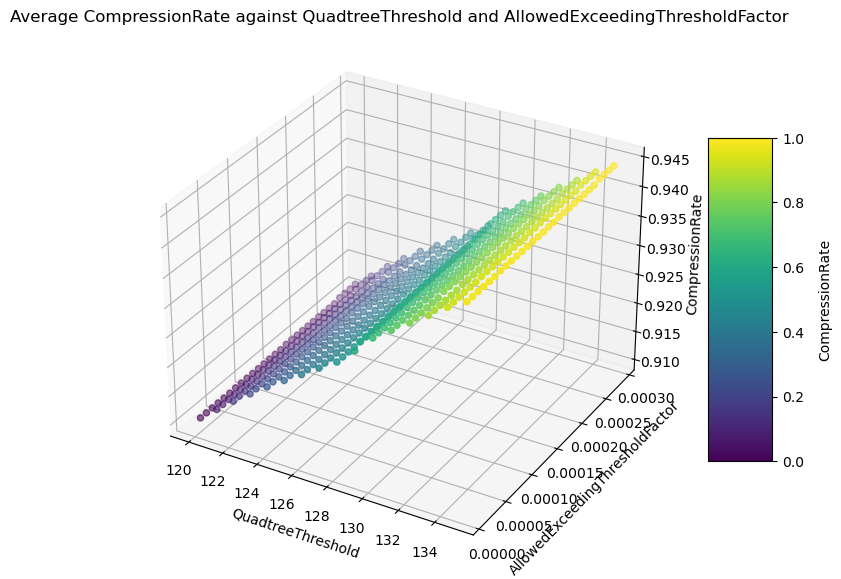

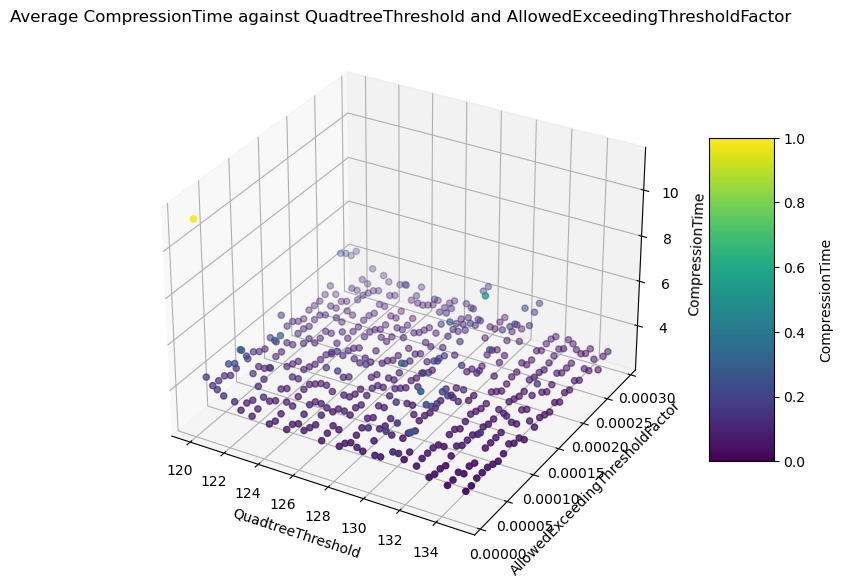

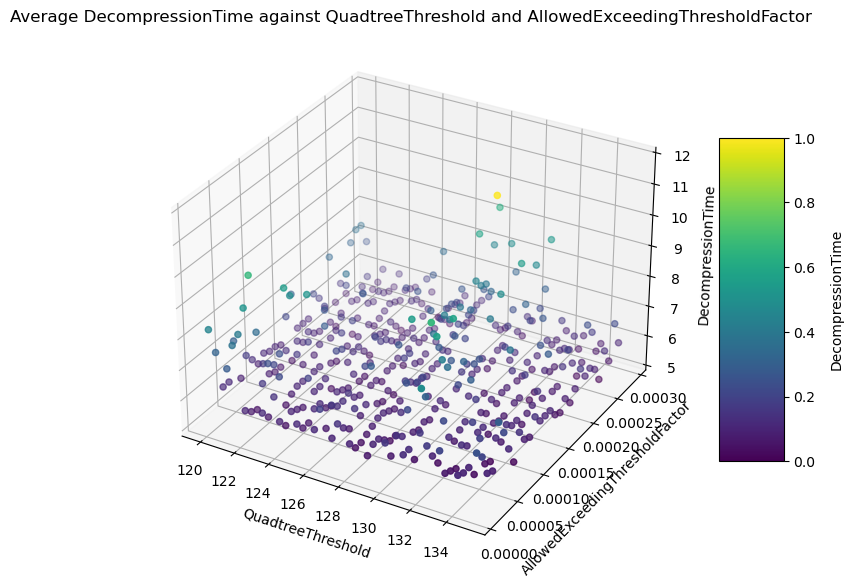

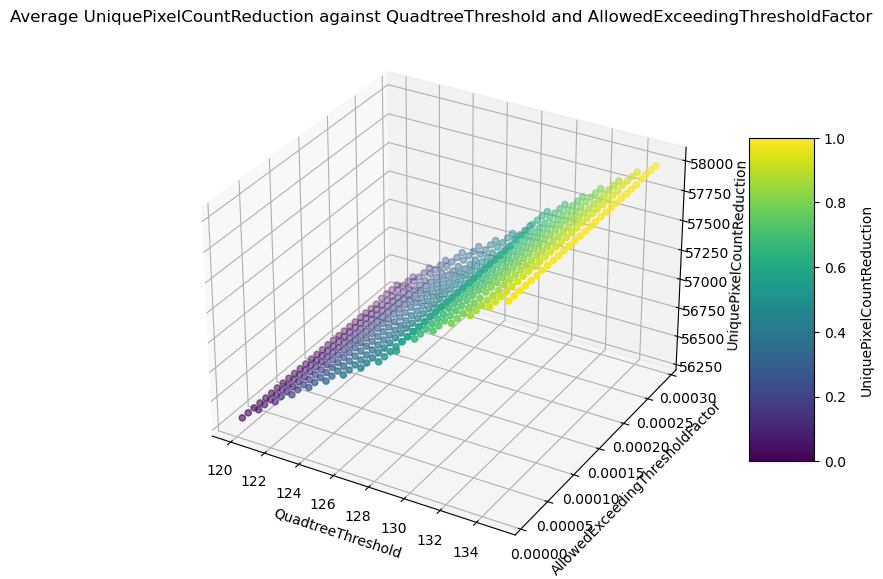

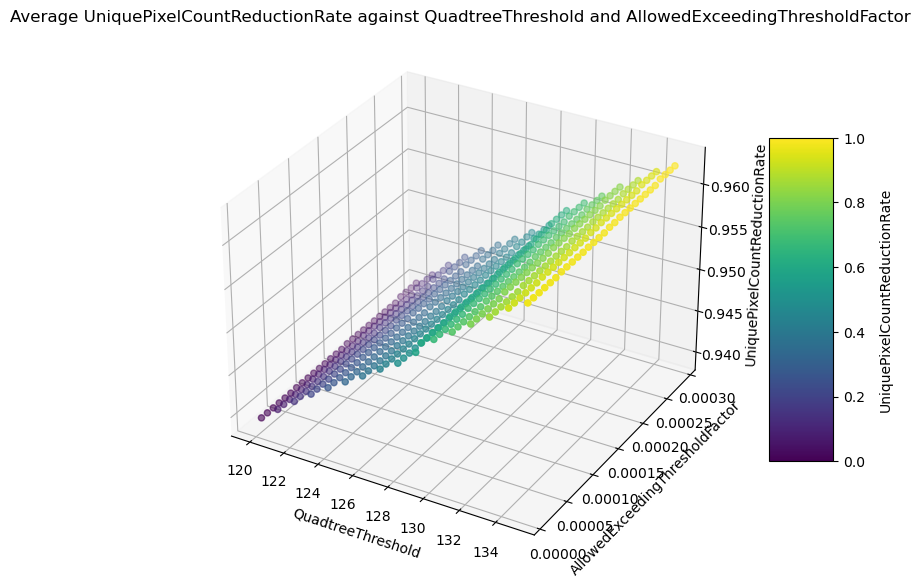

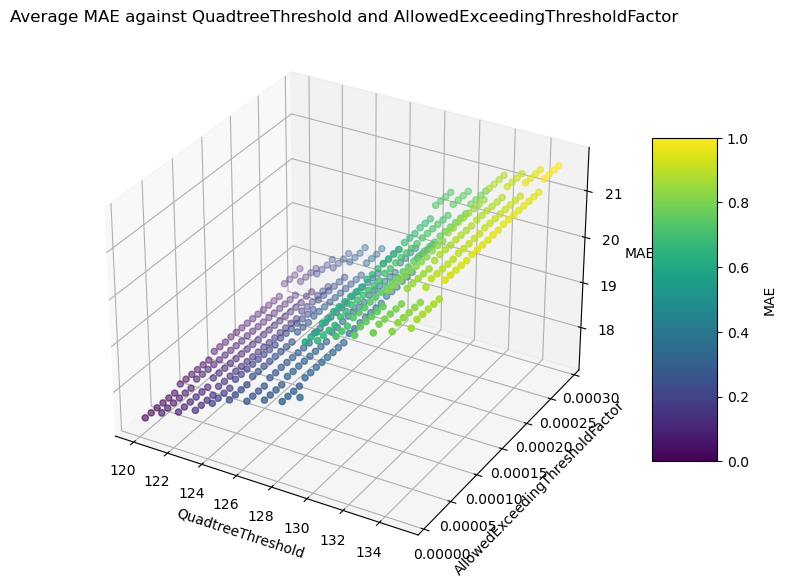

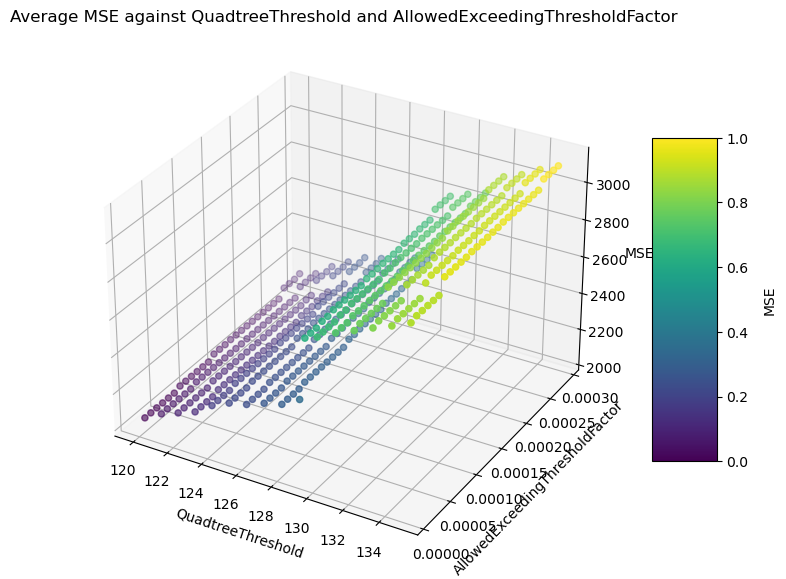

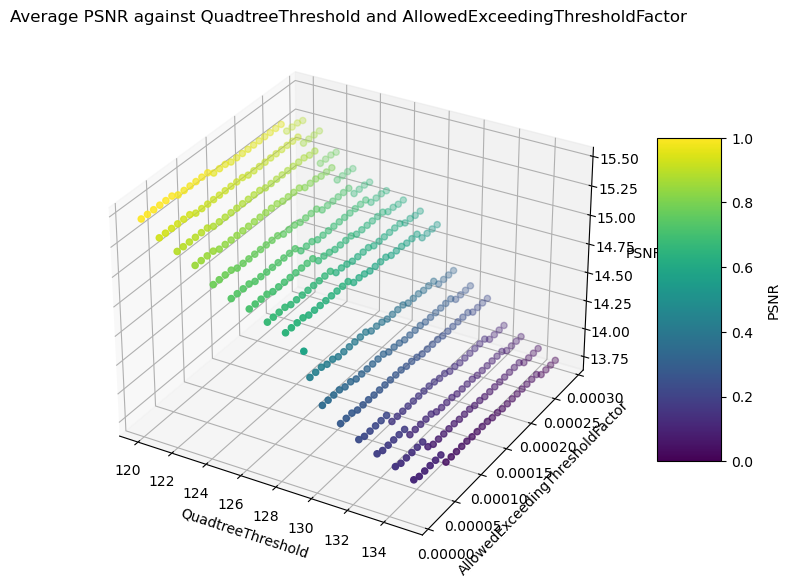

In [8]:
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

for metric in metrics:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Data for plotting
    x = data_grouped_by_test['QuadtreeThreshold']
    y = data_grouped_by_test['AllowedExceedingThresholdFactor']
    z = data_grouped_by_test[metric]
    
    # Using a colormap to represent Z values with colors
    norm = plt.Normalize(z.min(), z.max())
    colors = plt.cm.viridis(norm(z))
    sc = ax.scatter(x, y, z, c=colors)
    
    ax.set_xlabel('QuadtreeThreshold')
    ax.set_ylabel('AllowedExceedingThresholdFactor')
    ax.set_zlabel(metric)
    ax.set_title(f'Average {metric} against QuadtreeThreshold and AllowedExceedingThresholdFactor')
    
    # Adding a colorbar to the graph to indicate the scale
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
    cbar.set_label(metric, labelpad=10)
    
    plt.show()


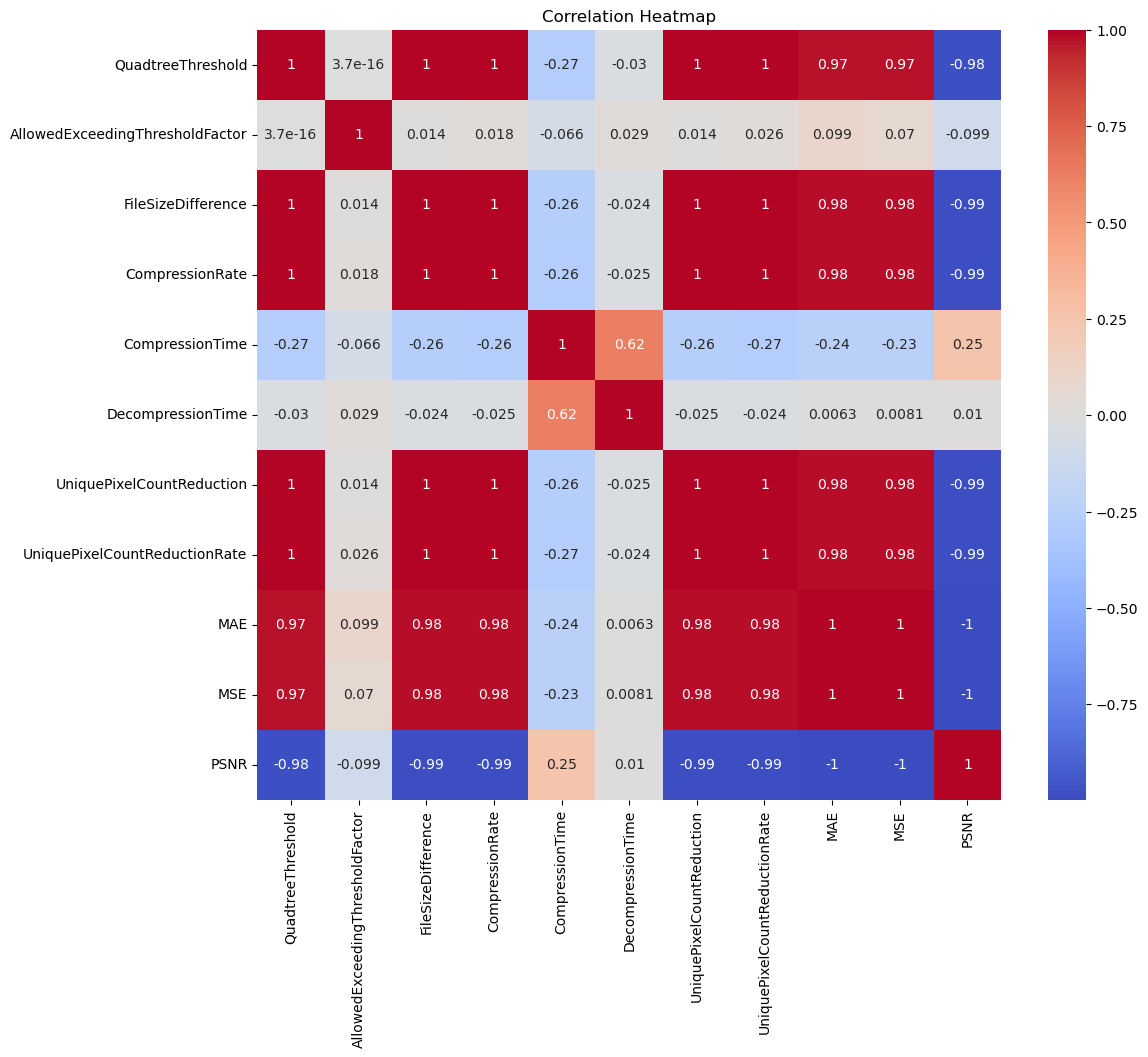

In [9]:
# Calculate the correlation matrix
correlation = data_grouped_by_test[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Score and Evaluation

In [10]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize metrics
data_grouped_by_test['CompressionRate'] = normalize(data_grouped_by_test['CompressionRate'])
data_grouped_by_test['CompressionTime'] = normalize(data_grouped_by_test['CompressionTime'])
data_grouped_by_test['DecompressionTime'] = normalize(data_grouped_by_test['DecompressionTime'])
data_grouped_by_test['MAE'] = normalize(data_grouped_by_test['MAE'])
data_grouped_by_test['MSE'] = normalize(data_grouped_by_test['MSE'])
data_grouped_by_test['PSNR'] = normalize(data_grouped_by_test['PSNR'])

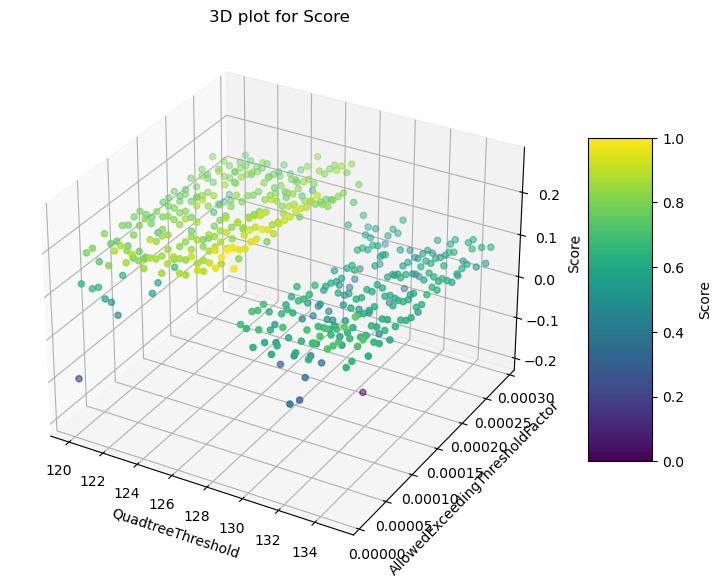

In [11]:
# Calculate LossScore
data_grouped_by_test['LossScore'] = -data_grouped_by_test['MAE'] - data_grouped_by_test['MSE'] + data_grouped_by_test['PSNR']

# Calculate the total score
data_grouped_by_test['Score'] = (5/9 * data_grouped_by_test['CompressionRate'] 
                         - 2/9 * (data_grouped_by_test['CompressionTime'] + data_grouped_by_test['DecompressionTime'])
                         + 2/9 * data_grouped_by_test['LossScore'])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data for plotting
x = data_grouped_by_test['QuadtreeThreshold']
y = data_grouped_by_test['AllowedExceedingThresholdFactor']
z = data_grouped_by_test['Score']

# Using a colormap to represent Z values (scores) with colors
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.viridis(norm(z))
sc = ax.scatter(x, y, z, c=colors)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
ax.set_title('3D plot for Score')

# Adding a colorbar to the graph
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
cbar.set_label('Score', labelpad=10)

plt.show()

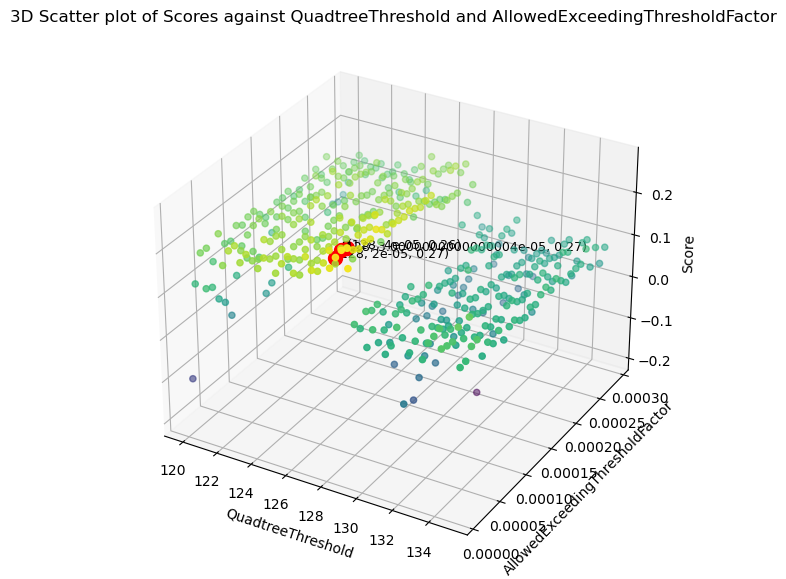

In [12]:
data_grouped_by_test = data_grouped_by_test.sort_values(by='Score', ascending=False)
top_3 = data_grouped_by_test.head(3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for all data points
ax.scatter(data_grouped_by_test['QuadtreeThreshold'], data_grouped_by_test['AllowedExceedingThresholdFactor'], data_grouped_by_test['Score'], c=data_grouped_by_test['Score'], cmap='viridis')

# Highlighting and annotating top 3 scores
for index, row in top_3.iterrows():
    ax.scatter(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], c='red', s=100)  # use larger size and red color
    label = '({}, {}, {:.2f})'.format(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'])
    ax.text(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], label, fontsize=9)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
plt.title('3D Scatter plot of Scores against QuadtreeThreshold and AllowedExceedingThresholdFactor')
plt.show()

In [13]:
# Print out the top 3
print(top_3[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])


     QuadtreeThreshold  AllowedExceedingThresholdFactor     Score
234                128                          0.00003  0.270429
233                128                          0.00002  0.265261
235                128                          0.00004  0.264373
